In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Simply drop the null value.

In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [6]:
att['nor_Salnty'] = normalization(att['Salnty'])
att['nor_T_degC'] = normalization(att['T_degC'])

In [7]:
batchSize = 500

In [8]:
x_data = att['nor_Salnty'].loc[:batchSize].tolist()
y_data = att['nor_T_degC'].loc[:batchSize].tolist()
# y_data = b + w * data_x

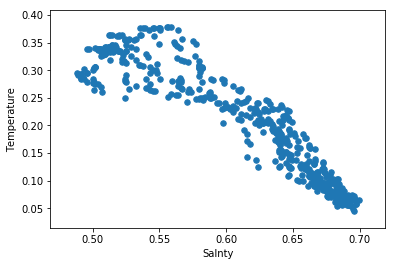

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

# Traning Phase
Used Gradient Descent.
Randomly generated w and b between -1 and 1.
Used Adagrad for learning rate.

In [10]:
b = random.uniform(-1, 1) # initial b
w = random.uniform(-1, 1) # initial w
lr = 1 # learning rate
iteration = 2000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

0.5415475515666637 0.26281098800205926 629.6216852565591
0.14443030045928984 -0.1436795275161063 124.14874480786875
0.273040530878935 -0.022132462646754794 16.60968950978678
0.23743817332982567 -0.06555965328029113 5.7092362055537285
0.2520687152081955 -0.058494245145828024 4.660840627576522
0.2513474992655355 -0.0668252869153656 4.538666288296716
0.25529974885748047 -0.07043420750254896 4.503060788050212
0.25781210525965537 -0.0754628816509992 4.475694897230047
0.26075084542664273 -0.08003645923409458 4.449266694124038
0.2635463125446995 -0.08472733389378832 4.423094409261747
0.2663724430024988 -0.08936085879189062 4.397113334232311
0.2691761902137931 -0.09399042038000235 4.371316249699206
0.27197379233255636 -0.09859979979900935 4.345701308977455
0.2747603392700456 -0.1031940236911378 4.320267172209957
0.27753737575789456 -0.10777163379084737 4.295012555707481
0.28030447623705496 -0.11233315084976123 4.2699361890538245
0.2830618163321173 -0.1168784913346796 4.2450368113054555
0.28580

0.6254458393000336 -0.6812859683322837 1.8377583063980412
0.6269832105852858 -0.6838202742737614 1.830011952463444
0.6285151534227662 -0.6863456316393373 1.8223201880118716
0.6300416870196156 -0.6888620720907661 1.8146826280812474
0.6315628305146004 -0.6913696271770962 1.807098890427935
0.6330786029783604 -0.6938683283350775 1.7995685955074814
0.6345890234136553 -0.6963582068895694 1.7920913664555
0.6360941107556113 -0.6988392940539448 1.7846668290687064
0.637593883871965 -0.701311620930495 1.7772946117860762
0.6390883615633085 -0.7037752185108309 1.769974345670126
0.6405775625633318 -0.7062301176762843 1.7627056643883632
0.6420615055390652 -0.708676349198307 1.7554882041948159
0.6435402090911206 -0.7111139437388682 1.7483216039117528
0.6450136917539319 -0.7135429318508508 1.741205504911488
0.6464819719959941 -0.7159633439784459 1.7341395510983253
0.6479450682201023 -0.718375210457546 1.7271233888906568
0.6494029987635889 -0.720778561516137 1.7201566672031479
0.6508557818985605 -0.7231

0.8447324614860889 -1.04277309582217 1.0094344354362805
0.8454958661578926 -1.0440315454974065 1.0075238712790584
0.8462565773477096 -1.0452855550535585 1.0056267641010412
0.8470146045636291 -1.0465351401643528 1.0037430191025407
0.8477699572801247 -1.047780316448105 1.001872542151926
0.8485226449381756 -1.049021099467915 1.0000152397809032
0.8492726769453842 -1.050257504731864 0.9981710191798548
0.850020062676095 -1.0514895476932096 0.9963397881931785
0.8507648114715131 -1.0527172437505798 0.994521455314685
0.8515069326398214 -1.053940608248168 0.9927159296830158
0.8522464354562979 -1.0551596564759254 0.990923121077093
0.8529833291634327 -1.0563744036697542 0.989142939911612
0.8537176229710443 -1.057584865011699 0.9873752972325537
0.8544493260563955 -1.0587910556301385 0.9856201047127289
0.855178447564309 -1.0599929905999756 0.9838772746473684
0.8559049966072833 -1.061190684942827 0.9821467199497294
0.8566289822656056 -1.062384153627213 0.9804283541467302
0.8573504135874681 -1.0635734

0.9501665457163222 -1.2165780579154934 0.8094922396991684
0.9505579911064957 -1.2172233441590532 0.8089898723059865
0.9509480556389056 -1.2178663540997787 0.8084910428728806
0.9513367441852969 -1.2185070957685893 0.8079957264823899
0.95172406160022 -1.2191455771680593 0.8075038983925666
0.9521100127210914 -1.2197818062725185 0.8070155340357301
0.9524946023682543 -1.2204157910281517 0.8065306090172434
0.9528778353450388 -1.2210475393530988 0.8060490991142928
0.9532597164378221 -1.2216770591375532 0.8055709802746744
0.9536402504160888 -1.2223043582438606 0.8050962286155996
0.9540194420324896 -1.2229294445066183 0.8046248204224931
0.9543972960229017 -1.2235523257327718 0.8041567321478162
0.9547738171064878 -1.2241730097017138 0.8036919404098819
0.9551490099857551 -1.2247915041653807 0.8032304219916954
0.9555228793466142 -1.2254078168483502 0.8027721538397804
0.9558954298584373 -1.2260219554479375 0.8023171130630494
0.9562666661741177 -1.2266339276342915 0.8018652769316322
0.95663659293012

1.000921184739273 -1.3002455964533215 0.7591623714478204
1.0011335933330947 -1.3005957458270887 0.7590144503706219
1.001345252672465 -1.3009446600768482 0.7588675710058239
1.0015561654004235 -1.3012923435595716 0.7587217260172239
1.0017663341506844 -1.301638800616859 0.7585769081202884
1.0019757615476708 -1.301984035574994 0.7584331100817789
1.0021844502065471 -1.3023280527449967 0.7582903247194065
1.002392402733251 -1.3026708564226788 0.7581485449014598
1.002599621724527 -1.3030124508886956 0.7580077635464537
1.002806109767958 -1.3033528404086012 0.7578679736227746
1.0030118694419985 -1.303692029232901 0.7577291681483339
1.003216903316006 -1.3040300215971048 0.7575913401902061
1.0034212139502738 -1.3043668217217794 0.7574544828643054
1.0036248038960625 -1.3047024338126025 0.7573185893350134
1.0038276756956317 -1.305036862060414 0.7571836528148628
1.0040298318822725 -1.3053701106412687 0.7570496665641852
1.0042312749803386 -1.3057021837164888 0.7569166238907711
1.0044320075052782 -1.30

1.0290344935384357 -1.346589567124732 0.7441279425531343
1.0291477354339087 -1.3467762430936028 0.7440858987310804
1.0292605778832227 -1.3469622605871217 0.7440441509936597
1.0293730222953876 -1.3471476219280016 0.74400269725575
1.0294850700744438 -1.3473323294307615 0.7439615354469176
1.0295967226194784 -1.347516385401756 0.7439206635113044
1.0297079813246437 -1.3476997921392035 0.7438800794075334
1.0298188475791736 -1.3478825519332163 0.7438397811086028
1.0299293227674018 -1.3480646670658274 0.7437997666017878
1.0300394082687785 -1.3482461398110202 0.7437600338885338
1.0301491054578877 -1.3484269724347568 0.7437205809843671
1.0302584157044652 -1.348607167195006 0.7436814059187815
1.0303673403734144 -1.348786726341771 0.7436425067351536
1.030475880824824 -1.348965652117119 0.7436038814906374
1.0305840384139857 -1.3491439467552073 0.7435655282560679
1.0306918144914092 -1.3493216124823135 0.7435274451158689
1.0307992104028414 -1.3494986515168605 0.7434896301679523
1.0309062274892813 -1.

1.0443223940097417 -1.3717912262363743 0.7397957549912212
1.044381709931382 -1.371889006807753 0.7397842196331146
1.044440816624621 -1.3719864424722006 0.7397727655100829
1.0444997148274842 -1.3720835344463307 0.739761392050046
1.0445584052753936 -1.3721802839424653 0.7397500986849508
1.044616888701177 -1.3722766921686498 0.7397388848507492
1.044675165835078 -1.3723727603286686 0.7397277499873618
1.044733237404763 -1.37246848962206 0.7397166935386541
1.044791104135333 -1.3725638812441305 0.7397057149524093
1.0448487667493302 -1.372658936385971 0.7396948136802973
1.044906225966749 -1.37275365623447 0.7396839891778528
1.0449634825050431 -1.3728480419723306 0.7396732409044403
1.0450205370791366 -1.3729420947780828 0.7396625683232362
1.0450773904014308 -1.3730358158261005 0.7396519709011935
1.0451340431818144 -1.3731292062866143 0.7396414481090231
1.0451904961276723 -1.3732222673257273 0.7396309994211595
1.045246749943894 -1.3733150001054295 0.7396206243157404
1.0453028053328826 -1.3734074

1.0521414370001956 -1.3846806911748686 0.7386266190942339
1.0521731723863492 -1.3847330060359195 0.7386233171004736
1.0522047958306053 -1.3847851363640085 0.7386200383602167
1.0522363077278227 -1.384837082810049 0.7386167827097089
1.0522677084714678 -1.384888846022658 0.738613549986344
1.0522989984536182 -1.3849404266481657 0.7386103400286632
1.0523301780649694 -1.3849918253306213 0.7386071526763462
1.0523612476948385 -1.3850430427118026 0.7386039877701993
1.0523922077311691 -1.3850940794312239 0.7386008451521495
1.052423058560537 -1.3851449361261432 0.7385977246652408
1.0524538005681534 -1.385195613431571 0.7385946261536167
1.0524844341378718 -1.385246111980278 0.7385915494625229
1.0525149596521908 -1.3852964324028023 0.7385884944382934
1.0525453774922606 -1.3853465753274585 0.7385854609283455
1.0525756880378863 -1.3853965413803446 0.738582448781169
1.0526058916675334 -1.3854463311853504 0.7385794578463206
1.0526359887583328 -1.3854959453641644 0.7385764879744183
1.0526659796860847 -1

1.0562906673782098 -1.3915205767753278 0.7382938646581584
1.0563077669682115 -1.391548764952124 0.7382929060080772
1.0563248062419484 -1.391576853699312 0.738291954109057
1.0563417854121773 -1.3916048433676151 0.7382910089135599
1.0563587046909044 -1.3916327343065193 0.7382900703743739
1.056375564289388 -1.3916605268642783 0.7382891384446262
1.0563923644181414 -1.3916882213879167 0.7382882130777721
1.0564091052869355 -1.3917158182232354 0.7382872942275897
1.056425787104801 -1.3917433177148157 0.7382863818481906
1.0564424100800311 -1.3917707202060234 0.7382854758940061
1.0564589744201849 -1.3917980260390128 0.7382845763197855
1.0564754803320886 -1.3918252355547314 0.738283683080603
1.0564919280218392 -1.3918523490929244 0.7382827961318417
1.0565083176948071 -1.391879366992138 0.738281915429204
1.0565246495556377 -1.391906289589725 0.7382810409287061
1.056540923808255 -1.3919331172218474 0.7382801725866666
1.0565571406558631 -1.3919598502234822 0.7382793103597174
1.0565733003009499 -1.39

1.058432397951339 -1.395051157335785 0.7382001519510913
1.0584419429051095 -1.395066891914475 0.7381998532502898
1.058451454190476 -1.39508257099178 0.7381995566530152
1.0584609319261984 -1.3950981947634726 0.7381992621444557
1.0584703762306182 -1.3951137634246353 0.7381989697099026
1.0584797872216594 -1.3951292771696624 0.7381986793347493
1.05848916501683 -1.395144736192262 0.7381983910044938
1.0584985097332236 -1.3951601406854597 0.7381981047047335
1.0585078214875205 -1.3951754908415999 0.7381978204211719
1.0585171003959897 -1.3951907868523483 0.7381975381396078
1.05852634657449 -1.3952060289086947 0.7381972578459455
1.0585355601384714 -1.3952212172009555 0.7381969795261847
1.0585447412029767 -1.3952363519187754 0.7381967031664222
1.0585538898826434 -1.39525143325113 0.738196428752858
1.0585630062917037 -1.3952664613863293 0.7381961562717841
1.0585720905439877 -1.3952814365120176 0.7381958857095948
1.0585811427529235 -1.3952963588151783 0.7381956170527729
1.0585901630315393 -1.395311

1.0596803492143998 -1.3971083686982189 0.738170050735295
1.0596854922058407 -1.3971168467700337 0.738169964015081
1.0596906170561453 -1.3971252949367126 0.7381698779055744
1.0596957238293034 -1.3971337133037414 0.738169792402471
1.0597008125890794 -1.3971421019762338 0.7381697075015051
1.0597058833990132 -1.397150461058933 0.7381696231984326
1.0597109363224197 -1.3971587906562126 0.7381695394890455
1.0597159714223914 -1.3971670908720781 0.7381694563691616
1.0597209887617975 -1.3971753618101679 0.7381693738346277
1.059725988403286 -1.397183603573755 0.7381692918813242
1.0597309704092834 -1.3971918162657482 0.7381692105051583
1.0597359348419966 -1.3971999999886933 0.7381691297020627
1.0597408817634124 -1.3972081548447741 0.7381690494680045
1.0597458112352995 -1.3972162809358144 0.738168969798975
1.0597507233192087 -1.3972243783632783 0.738168890690997
1.0597556180764731 -1.3972324472282727 0.7381688121401179
1.05976049556821 -1.397240487631547 0.7381687341424131
1.059765355855321 -1.3972

1.0604089539151549 -1.3983094523571264 0.7381608185165435
1.060411526862008 -1.398313693785184 0.7381607968120142
1.0604140907331745 -1.398317920252236 0.7381607752603349
1.0604166455606672 -1.3983221318110548 0.738160753860427
1.0604191913763863 -1.398326328514227 0.738160732611224
1.0604217282121198 -1.3983305104141535 0.7381607115116615
1.0604242560995427 -1.398334677563051 0.7381606905606891
1.0604267750702194 -1.3983388300129513 0.738160669757258
1.060429285155602 -1.398342967815703 0.7381606491003296
1.0604317863870325 -1.3983470910229716 0.7381606285888742
1.0604342787957413 -1.3983511996862408 0.7381606082218646


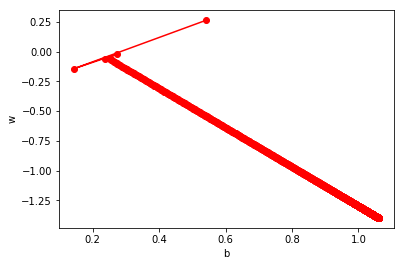

In [11]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

# Visualiaze the Loss
The loss value stopped changing dramatically after the second iteration so I only plotted the first 10 iterations.

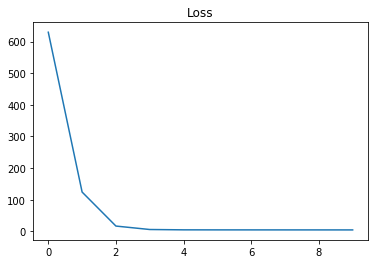

In [12]:
# visualize the loss
fig = plt.figure()
plt.title("Loss")
plt.plot(range(0,10), loss_history[0:10])    
plt.show()

# Denomalize *w* and *b*

In [13]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b)+min(y)
    return den_w, den_b

In [14]:
x_output = att['T_degC'].loc[:batchSize].tolist()
y_output = att['Salnty'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-0.25759101046851807, 35.27609339651073)

# Plot the result

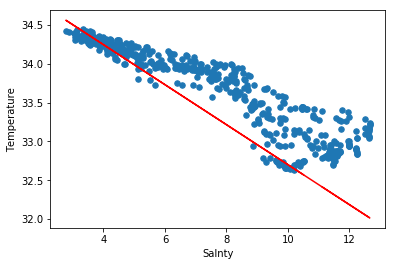

In [15]:
# x_output = att['nor_Salnty'].loc[:batchSize].tolist()
# y_output = att['T_degC'].loc[:batchSize].tolist()

plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = pd.Series(x_output)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')
plt.show()